In [4]:
import os 
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



path0 = []
path1 = []
path2 = []
path3 = []
path4 = []
path5 = []
path6 = []

# Testing just for brain_bone_window, could combine all windows
for dirname, _, filenames in os.walk('../data/epidural/max_contrast_window'):
    for filename in filenames:
        path0.append(os.path.join(dirname, filename))
    print("Number of type 0: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/intraparenchymal/max_contrast_window'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
    print("Number of type 1: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/intraventricular/max_contrast_window'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
    print("Number of type 2: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/multi/max_contrast_window'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))  
    print("Number of type 3: ", len(filenames))

for dirname, _, filenames in os.walk('../data/normal/max_contrast_window'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  
    print("Number of type 4: ", len(filenames))

for dirname, _, filenames in os.walk('../data/subarachnoid/max_contrast_window'):
    for filename in filenames:
        path5.append(os.path.join(dirname, filename))  
    print("Number of type 5: ", len(filenames))

for dirname, _, filenames in os.walk('../data/subdural/max_contrast_window'):
    for filename in filenames:
        path6.append(os.path.join(dirname, filename))  
    print("Number of type 6: ", len(filenames))


import random


data = []
result = []

for index, path in enumerate(path0):
    img = Image.open(path)
    img = ImageOps.grayscale(img) # Removes RGB dimension from image, not sure if this is alright
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(0)
    if index == 1500:
        print(len(data))
        break
        
for index, path in enumerate(path1):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(1) 
    if index == 1500:
        print(len(data))
        break
        
for index, path in enumerate(path2):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(2)
    if index == 1500:
        print(len(data))
        break
        
for index, path in enumerate(path3):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(3)
    if index == 1500:
        print(len(data))
        break

for index, path in enumerate(path4):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(4)
    if index == 1500:
        print(len(data))
        break
        
for index, path in enumerate(path5):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(5)
    if index == 1500:
        print(len(data))
        break

for index, path in enumerate(path6):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(6)
    if index == 1500:
        print(len(data))
        break

length = len(data)

indices = np.arange(length)
np.random.shuffle(indices)

# Shuffle both arrays using the shuffled indices
shuffled_data = [data[i] for i in indices]
shuffled_result = [result[i] for i in indices]

train_data = shuffled_data[0:int(length*0.5)]
train_result = shuffled_result[0:int(length*0.5)]

test_data = shuffled_data[int(length*0.5):]
test_result = shuffled_result[int(length*0.5):]  # FIXME: trying to reduce data so calling fit() doesn't take forever


test_data = np.array(test_data)
test_data.shape

test_result = np.array(test_result)
test_result.shape


train_data = np.array(train_data)
test_data.shape

train_result = np.array(train_result)
train_result.shape


# Confirm shape of data 
print("train data: ", train_data.shape)
print("test data: ", test_data.shape)
print("train data after reshape: ", train_data.reshape(-1,100*100).shape)
print("test data after reshape: ", test_data.reshape(-1,100*100).shape)


from sklearn.linear_model import LogisticRegression


X = train_data.reshape(train_data.shape[0], -1) 
y = train_result



Number of type 0:  1694
Number of type 1:  15664
Number of type 2:  9878
Number of type 3:  32074
Number of type 4:  8599
Number of type 5:  16423
Number of type 6:  32200
1501
3002
4503
6004
7505
9006
10507
train data:  (5253, 100, 100)
test data:  (5254, 100, 100)
train data after reshape:  (5253, 10000)
test data after reshape:  (5254, 10000)


Logistic Regression Score: 0.26532165968785687


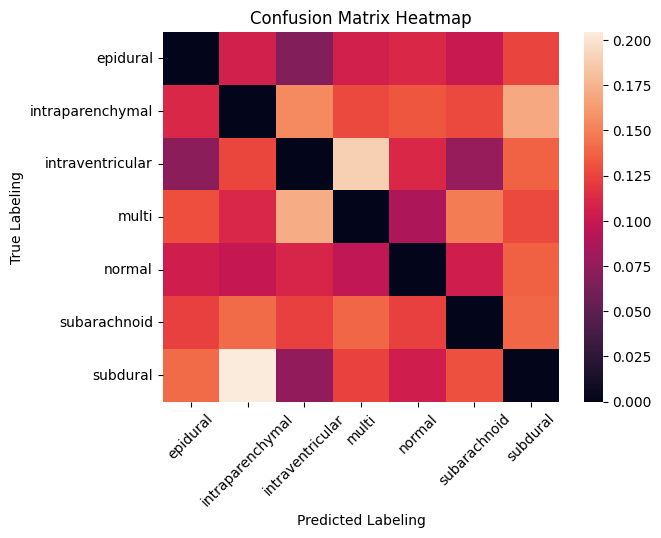

In [5]:
import os 
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 100*100))  # Reshape for scaling
X_test_scaled = scaler.transform(X_test.reshape(-1, 100*100))  # Reshape for scaling

# Create and train the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
score = logreg.score(X_test_scaled, y_test)
print("Logistic Regression Score:", score)

# Generate and save the confusion matrix heatmap
y_predict = logreg.predict(X_test_scaled)
conf_mx = confusion_matrix(y_test, y_predict)

row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx / row_sum
np.fill_diagonal(nconf_mx, 0)

labels = ['epidural', 'intraparenchymal', 'intraventricular', 'multi', 'normal', 'subarachnoid', 'subdural']
sns.heatmap(nconf_mx, xticklabels=labels, yticklabels=labels)
plt.xticks(rotation=45)
plt.xlabel("Predicted Labeling")
plt.ylabel("True Labeling")
plt.title("Confusion Matrix Heatmap")

plt.savefig('confusion_matrix_heatmap_scaled.png')